In [1]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

annotation of algorithm and code from Applied Mathematics with Open-Source Software by Knight and Palmer p115-126

### Example of building a distance matrix

In [52]:
coords = [[5,7], [6,9], [4,4]]
towns = ['Arkham', 'Dunwich', 'Insmouth']
df = pd.DataFrame(coords, columns=['x_coord', 'y_coord'], index=towns)

In [53]:
df

,x_coord,y_coord
Arkham,5,7
Dunwich,6,9
Insmouth,4,4


In [54]:
pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

,Arkham,Dunwich,Insmouth
Arkham,0.000000,2.236068,3.162278
Dunwich,2.236068,0.000000,5.385165
Insmouth,3.162278,5.385165,0.000000


### creating random points bounded by a polygon

In [2]:
def Random_Points_in_Polygon(polygon, number):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

In [ ]:
polygon = Polygon([[42.497830,-80.599547],
                   [43.362853, -80.423271],[43.5121265, -80.480605],[43.344230, -80.597123],
                   [42.497830,-80.599547]])
points = Random_Points_in_Polygon(polygon, 25)

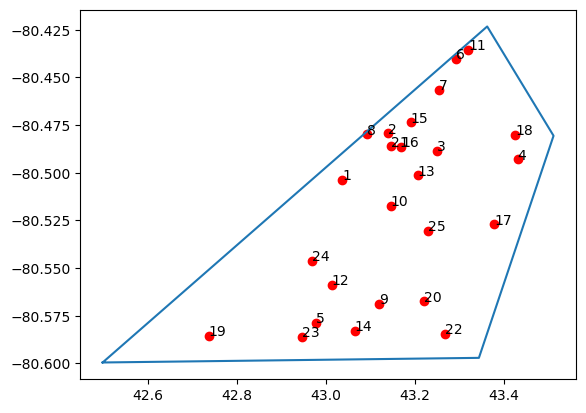

In [5]:
fig, ax = plt.subplots()

# Plot the polygon
xp,yp = polygon.exterior.xy
plt.plot(xp,yp)

# Plot the list of points
xs = [point.x for point in points]
ys = [point.y for point in points]
n = list(range(1,26))

plt.scatter(xs, ys,color="red")
for i, txt in enumerate(n):
    ax.annotate(txt, (xs[i], ys[i]))


plt.show()

### create a distance matrix for the random points

In [7]:
point_list = [(p.x,p.y) for p in points]
point_df = pd.DataFrame(point_list, columns=['x_coord', 'y_coord'], index=point_list)
dm = pd.DataFrame(distance_matrix(point_df.values, point_df.values), index=point_df.index, columns=point_df.index)

In [ ]:
dm

In [9]:
d_matrix = distance_matrix(point_df.values, point_df.values)  # create a simplier version

In [11]:
d_matrix

array([[0.        , 0.10507897, 0.21355853, 0.39468388, 0.09642747,
        0.26263057, 0.22307209, 0.0599807 , 0.10547127, 0.1092806 ,
        0.29167116, 0.06047996, 0.16982712, 0.08397159, 0.15667987,
        0.13403367, 0.34175801, 0.39000237, 0.31153258, 0.19402939,
        0.11065773, 0.24462516, 0.12186189, 0.08025947, 0.19399567],
       [0.10507897, 0.        , 0.11118745, 0.29264984, 0.19066583,
        0.15755997, 0.11803916, 0.04719562, 0.09135999, 0.03852752,
        0.1865925 , 0.14968897, 0.07110743, 0.12730998, 0.05187044,
        0.0315105 , 0.24348412, 0.28707899, 0.41657307, 0.11978711,
        0.00988454, 0.1661789 , 0.21969747, 0.18295426, 0.10350289],
       [0.21355853, 0.11118745, 0.        , 0.181578  , 0.2879651 ,
        0.06385894, 0.03228278, 0.15823914, 0.15265235, 0.10849226,
        0.08827656, 0.24776697, 0.04508052, 0.20758527, 0.06108356,
        0.08013183, 0.133639  , 0.17647077, 0.52270182, 0.08447779,
        0.10377173, 0.09758094, 0.31815099, 0.

### create a random path through the points

In [12]:
def get_initial_candidate(number_of_stops, seed):
    """Return a random initial tour.
    
    Args:
    number_of_stops: the number of stops
    seed: An integer seed
    
    
    returns:
    A tour starting and ending at stop with index 0
    """
    internal_stops = list(range(1, number_of_stops))
    np.random.seed(seed)
    np.random.shuffle(internal_stops)
    return [0] + internal_stops + [0]

In [13]:
number_of_stops = 25
seed = 9
initial_candidate = get_initial_candidate(number_of_stops=number_of_stops, seed=seed)
print(initial_candidate)

[0, 5, 10, 6, 4, 8, 19, 17, 7, 3, 14, 16, 11, 20, 12, 15, 13, 1, 24, 18, 9, 21, 2, 23, 22, 0]


#### calculate the cost of the initial tour

In [14]:
tour = initial_candidate
coordinate_points = zip(tour[:-1], tour[1:])
x = [d_matrix[current_stop, next_stop] for current_stop, next_stop in coordinate_points]

In [15]:
x # the distance to each step in the path

[0.262630574138299,
 0.02912078535009215,
 0.06886053632046311,
 0.30410382136587555,
 0.14386475368833565,
 0.10012948198577884,
 0.2238529923728973,
 0.33427105345821445,
 0.33977874002376307,
 0.24154785903675424,
 0.19467550811028694,
 0.3668531847695157,
 0.15228743388345703,
 0.06240421471615369,
 0.03981745255535951,
 0.14242132606100022,
 0.1273099798847588,
 0.10350288929707357,
 0.4957857681206137,
 0.4146744019765914,
 0.13966438619370408,
 0.09758093956965382,
 0.2869536026269156,
 0.04539777097864412,
 0.12186189085372001]

In [16]:
coordinate_points = zip(tour[:-1], tour[1:])
print(list(coordinate_points))  # each step in the path

[(0, 5), (5, 10), (10, 6), (6, 4), (4, 8), (8, 19), (19, 17), (17, 7), (7, 3), (3, 14), (14, 16), (16, 11), (11, 20), (20, 12), (12, 15), (15, 13), (13, 1), (1, 24), (24, 18), (18, 9), (9, 21), (21, 2), (2, 23), (23, 22), (22, 0)]


In [21]:
def get_cost(tour, distance_matrix):
    '''Return the cost of a tour.
    
    Args:
        tour: A given tuple of successive stops.
        distance_matrix: The distance matrix of the problem.
        
    Returns:
        The cost
    '''
    return sum(distance_matrix[current_stop, next_stop] for current_stop, next_stop in zip(tour[:-1], tour[1:]))

In [22]:
cost = get_cost(tour=initial_candidate, distance_matrix=d_matrix)
print(cost)

4.839351347337922


In [23]:
def swap_stops(tour):
    '''Return a new tour by swapping two stops.
    
    Args:
        tour: A given tuple of successive stops.
        
    Returns:
        A tour
    '''
    number_of_stops = len(tour) - 1
    i, j = np.random.choice(range(1, number_of_stops), 2)
    #print(f'swapping {i} with {j}')
    new_tour = list(tour)
    new_tour[i], new_tour[j] = tour[j], tour[i]
    return new_tour

In [24]:
print(swap_stops(initial_candidate))

[0, 5, 10, 6, 4, 8, 19, 22, 7, 3, 14, 16, 11, 20, 12, 15, 13, 1, 24, 18, 9, 21, 2, 23, 17, 0]


### grind through permutations of the route to find a better solution

In [25]:
def run_neighbourhood_search(distance_matrix, iterations, seed, neighbourhood_operator=swap_stops):
    number_of_stops = len(distance_matrix)
    candidate = get_initial_candidate(number_of_stops=number_of_stops, seed=seed,)
    best_cost = get_cost(tour=candidate, distance_matrix=distance_matrix,)
    for _ in range(iterations):
        new_candidate = neighbourhood_operator(candidate) # swap_stops
        cost = get_cost(tour=new_candidate, distance_matrix=distance_matrix,) # calc new cost
        if cost <= best_cost: # is it better?
            best_cost = cost
            candidate = new_candidate
    return candidate, best_cost

In [27]:
number_of_iterations = 9000
solution_with_swap_stops = run_neighbourhood_search(distance_matrix = d_matrix, 
                                                    iterations = number_of_iterations,
                                                    seed = seed,
                                                    neighbourhood_operator=swap_stops,
                                                   )


In [28]:
solution_with_swap_stops

([0,
  23,
  18,
  22,
  4,
  11,
  13,
  8,
  2,
  16,
  3,
  17,
  10,
  5,
  6,
  14,
  12,
  24,
  21,
  19,
  15,
  20,
  1,
  9,
  7,
  0],
 1.8057024470719056)

In [30]:
solution_points = zip(solution_with_swap_stops[0][:-1], solution_with_swap_stops[0][1:])
print(list(solution_points))

[(0, 23), (23, 18), (18, 22), (22, 4), (4, 11), (11, 13), (13, 8), (8, 2), (2, 16), (16, 3), (3, 17), (17, 10), (10, 5), (5, 6), (6, 14), (14, 12), (12, 24), (24, 21), (21, 19), (19, 15), (15, 20), (20, 1), (1, 9), (9, 7), (7, 0)]


In [46]:
def return_route(solution=solution_with_swap_stops, p_list=point_list):
    solution_p = zip(solution[0][:-1], solution[0][1:])
    return [p_list[i] for i, _ in solution_p]

In [32]:
route = return_route()
print(route)

[(43.03717306519377, -80.50369685731886), (42.969107415416104, -80.5462250885295), (42.736570306681735, -80.58549251979808), (42.94738460550742, -80.58608831894928), (42.976782195938625, -80.57887131695112), (43.01267024671777, -80.55899095230681), (43.065286891315424, -80.5828223292416), (43.120282357581175, -80.56863554817845), (43.25018769463496, -80.48846483667049), (43.378131386206746, -80.52706267801969), (43.43171044102488, -80.49294403306556), (43.42645714270212, -80.48003775122737), (43.32073576392157, -80.4354014722738), (43.29201485577916, -80.4402107939392), (43.25521141013973, -80.45657533644201), (43.19093743746108, -80.47361196229947), (43.206983781479686, -80.50133633112515), (43.22930183790741, -80.53054558169457), (43.26810744373076, -80.58438627514823), (43.22040561147145, -80.56751877015031), (43.17008305167168, -80.48637753212138), (43.14644044969587, -80.48621049260775), (43.139379121103204, -80.47929372226105), (43.145601773421944, -80.51731540581548), (43.092186

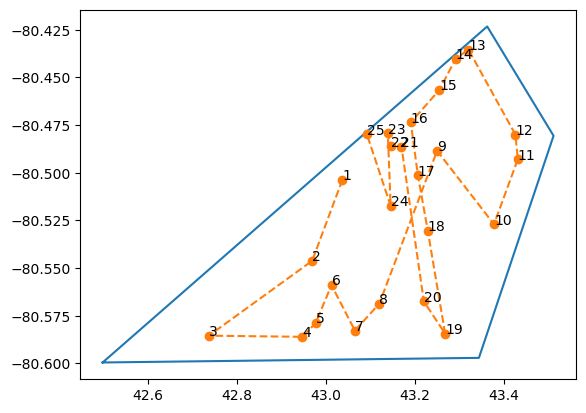

In [34]:
'''
polygon = Polygon([[42.497830,-80.599547],
                   [43.362853, -80.423271],[43.5121265, -80.480605],[43.344230, -80.597123],
                   [42.497830,-80.599547]])
                   '''
# Plot the polygon
#xp,yp = polygon.exterior.xy

n = list(range(1, 26))

fig, ax = plt.subplots()
plt.plot(xp,yp)

route_array = np.array(route)
x = route_array[:, 0]
y = route_array[:,1]

# Plot the list of points
#plt.scatter(xs, ys, color="red")
plt.plot(x, y, '--o')
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))


plt.show()

after 9k iterations the solution is not optimal

In [41]:
def reverse_path(tour):
    '''return a new tour by reversing the path between two stops
    This is an implementation of the 2-opt algorithm
    https://en.wikipedia.org/wiki/2-opt
    but is taken from page 124-125 of the text
    
    Args:
        tour: A given tuple of successive stops
        
    Returns:
        A tour
    '''
    number_of_stops = len(tour) - 1
    stops = np.random.choice(range(1, number_of_stops), 2)
    i, j = sorted(stops)
    new_tour = tour[:i] + tour[i : j + 1][::-1] + tour[j + 1 :]
    return new_tour

In [42]:
print(reverse_path(initial_candidate))

[0, 5, 10, 6, 4, 8, 19, 17, 7, 3, 23, 2, 21, 9, 18, 24, 1, 13, 15, 12, 20, 11, 16, 14, 22, 0]


In [43]:
solution_w_reverse_path = run_neighbourhood_search(distance_matrix=d_matrix,
                                                  iterations = number_of_iterations,
                                                  seed = seed,
                                                  neighbourhood_operator = reverse_path,
                                                  )
print(solution_w_reverse_path)

([0, 23, 18, 22, 4, 11, 13, 8, 19, 21, 16, 3, 17, 10, 5, 6, 2, 24, 12, 14, 15, 20, 1, 9, 7, 0], 1.6189744546045466)


In [50]:
print(solution_with_swap_stops)

([0, 23, 18, 22, 4, 11, 13, 8, 2, 16, 3, 17, 10, 5, 6, 14, 12, 24, 21, 19, 15, 20, 1, 9, 7, 0], 1.8057024470719056)


In [48]:
new_route = return_route(solution_w_reverse_path, point_list)
print('old route')
print(route)
print('new route')
print(new_route)

old route
[(43.03717306519377, -80.50369685731886), (42.969107415416104, -80.5462250885295), (42.736570306681735, -80.58549251979808), (42.94738460550742, -80.58608831894928), (42.976782195938625, -80.57887131695112), (43.01267024671777, -80.55899095230681), (43.065286891315424, -80.5828223292416), (43.120282357581175, -80.56863554817845), (43.25018769463496, -80.48846483667049), (43.378131386206746, -80.52706267801969), (43.43171044102488, -80.49294403306556), (43.42645714270212, -80.48003775122737), (43.32073576392157, -80.4354014722738), (43.29201485577916, -80.4402107939392), (43.25521141013973, -80.45657533644201), (43.19093743746108, -80.47361196229947), (43.206983781479686, -80.50133633112515), (43.22930183790741, -80.53054558169457), (43.26810744373076, -80.58438627514823), (43.22040561147145, -80.56751877015031), (43.17008305167168, -80.48637753212138), (43.14644044969587, -80.48621049260775), (43.139379121103204, -80.47929372226105), (43.145601773421944, -80.51731540581548), 

In [49]:
route == new_route

False

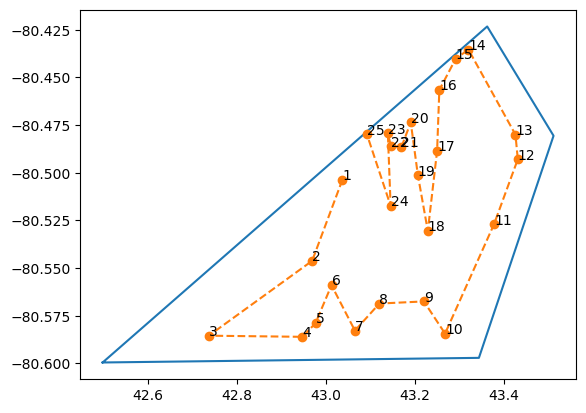

In [51]:
n = list(range(1, 26))

fig, ax = plt.subplots()
plt.plot(xp,yp)

route_array = np.array(new_route)
x = route_array[:, 0]
y = route_array[:,1]

# Plot the list of points
#plt.scatter(xs, ys, color="red")
plt.plot(x, y, '--o')
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))


plt.show()